In [1]:
from numpy import asarray
import matplotlib.pyplot as plt

In [2]:
# Path to images
directory = "D:\\Dataset\\celebA\\img_align_celeba\\img_align_celeba\\"

In [3]:
# Load an image using Pillow library
from PIL import Image
def load_image(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    return pixels

In [4]:
# Load n number of images from directory
from os import listdir
def load_images(directory, n):
    images = []
    for filename in listdir(directory):
        pixels = load_image(directory+filename)
        images.append(pixels)
        if len(images) >= n:
            break
    return asarray(images)

In [5]:
# Plot some images
def plot_images(images, n):
    plt.figure(figsize=(12,8))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(images[i])
    plt.show()

Loaded Images:  (25, 218, 178, 3)


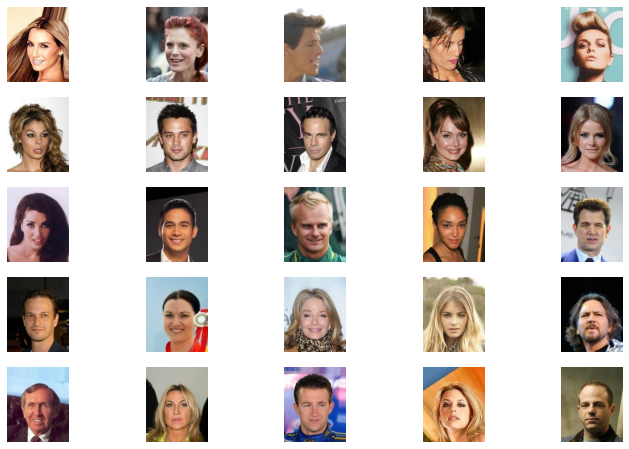

In [6]:
images = load_images(directory, 25)
print("Loaded Images: ", images.shape)
plot_images(images, 5)

In [7]:
# A pre-trained Multi-Task Cascaded Convolutional Neural Network for face detection
from mtcnn.mtcnn import MTCNN

In [8]:
# Extract face from image using MTCNN model and resize it to a particular size
def extract_face(model, pixels, required_size=(80,80)):
    faces = model.detect_faces(pixels)
    if len(faces) == 0:
        return None
    
    x1, y1, width, height = faces[0]['box']
    x1 = abs(x1)
    y1 = abs(y1)
    x2 = x1+width
    y2 = y1+height
    
    face_pixels = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [33]:
# Load n_faces number of images from directory and extract faces
from tqdm import tqdm
def load_faces(filenames):
    model = MTCNN()
    faces = []
    count = 0
    for i in tqdm(range(len(filenames))):
        pixels = load_image(directory+filenames[i])
        face = extract_face(model, pixels)
        if face is None:
            continue
        faces.append(face)
#         print(len(faces), face.shape)
        count += 1
#         print("Processed", filename)
    return asarray(faces, dtype="float32")

In [34]:
from numpy import savez_compressed

n = 25000
filenames = []
for filename in listdir(directory):
    filenames.append(filename)
    if len(filenames) >= n:
        break
all_faces = load_faces(filenames)
savez_compressed('faces.npz', all_faces)

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [2:21:34<00:00,  2.94it/s]
